In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


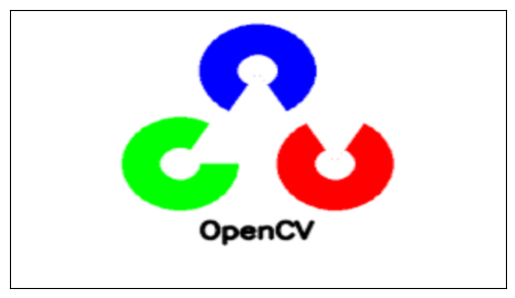

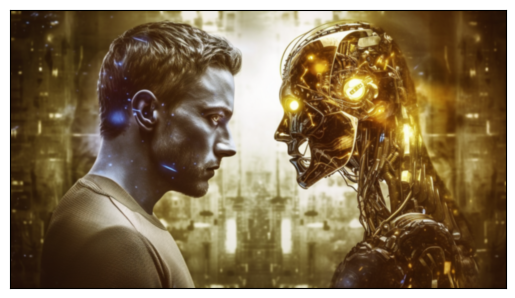

In [50]:
img = cv2.imread('opencv.jpg')
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()
img = cv2.imread('aiimg.png')
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [51]:
img1 = cv2.imread('aiimg.png')
img2 = cv2.imread('opencv.jpg')
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [52]:
# Load two images
img2 = cv2.imread('aiimg.png')
img1 = cv2.imread('opencv.jpg')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 144, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [53]:


e1 = cv2.getTickCount()
# your code execution
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()

img1 = cv2.imread('apart.jpg')
e1 = cv2.getTickCount()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()
print (t)

cv2.imshow('apart.jpg',img)
cv2.waitKey(0)
cv2.destroyAllWindows()



1.4805784


In [54]:
import cv2
import numpy as np

img1 = cv2.imread('apart.jpg')
def nothing(x):
    pass
# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')
# create trackbars for color change
cv2.createTrackbar('median','image',0,10,nothing)
ming1 =  img1
while(1):
    cv2.imshow('image',ming1)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
# get current positions of four trackbars
    m = cv2.getTrackbarPos('median','image')
    ming1 = cv2.medianBlur(img1,2*m+1)
cv2.destroyAllWindows()


In [55]:
import cv2
import numpy as np

img1 = cv2.imread('aiimg.png')
img2 = cv2.imread('opencv.jpg')
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

def nothing(x):
    pass
# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')
# create trackbars for color change
cv2.createTrackbar('median','image',0,10,nothing)
ming1 =  dst
while(1):
    cv2.imshow('image',ming1)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
# get current positions of four trackbars
    m = cv2.getTrackbarPos('median','image')
    ming1 = cv2.medianBlur(dst,2*m+1)
cv2.destroyAllWindows()\


#과제 31p 참조하고 위에코드랑 컬러체널 1.3.1참조  하면됨

In [61]:
#homework

import cv2
import numpy as np

img1 = cv2.imread('apart.jpg')

drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        x,iy = x,y
    
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,255),-1)
        else:
            cv2.circle(img,(x,y),5,(255,0,255),-1)
    elif event == cv2.EVENT_RBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,0,0),500)
def nothing(x):
    pass
# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')
# create trackbars for color change
cv2.createTrackbar('median','image',0,10,nothing)
ming1 =  img1
while(1):
    cv2.imshow('image',ming1)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
# get current positions of four trackbars
    m = cv2.getTrackbarPos('median','image')
    ming1 = cv2.medianBlur(img1,2*m+1)

cv2.destroyAllWindows()